 # Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('US_Accidents.csv')

In [3]:
df.shape

(1048575, 47)

In [4]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,08-02-2016 00:37,08-02-2016 06:37,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,08-02-2016 05:56,08-02-2016 11:56,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,08-02-2016 06:15,08-02-2016 12:15,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,08-02-2016 06:15,08-02-2016 12:15,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,08-02-2016 06:51,08-02-2016 12:51,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


In [6]:
df['Start_Time'].head()

0    08-02-2016 00:37
1    08-02-2016 05:56
2    08-02-2016 06:15
3    08-02-2016 06:15
4    08-02-2016 06:51
Name: Start_Time, dtype: object

In [7]:
df['Start_Time'].isna().sum()

0

In [8]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce', infer_datetime_format=True)

C:\Users\akhul\AppData\Local\Temp\ipykernel_3108\878425769.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce', infer_datetime_format=True)


In [9]:
df = df.dropna(subset=['Start_Time'])
df['Hour'] = df['Start_Time'].dt.hour
print(df['Hour'].value_counts())

Hour
16    25042
17    25008
15    24099
14    21616
18    20767
13    20765
12    16933
8     16410
7     15801
19    15106
6     13115
23    12682
9     12620
1     12560
20    12480
21    12279
22    12085
0     12085
11    11821
10    11080
2     10312
5      9067
3      8091
4      7450
Name: count, dtype: int64


In [10]:
df['Hour'].isna().sum()

0

In [11]:
df['Hour'].unique()

array([ 0,  5,  6,  7,  8, 11, 14, 15, 16, 17, 18, 19, 20, 21,  9, 10, 12,
       22, 13, 23,  1,  4,  3,  2])

In [12]:
df['Weekday'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month_name()

In [13]:
df['Weather_Condition'] = df['Weather_Condition'].fillna('Unknown')

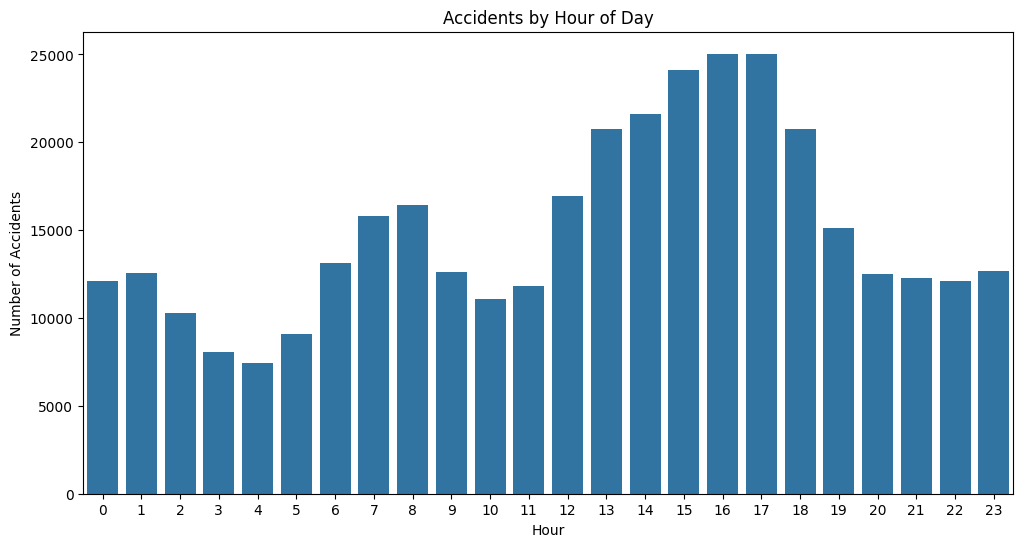

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=df, order=range(24))
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.show()

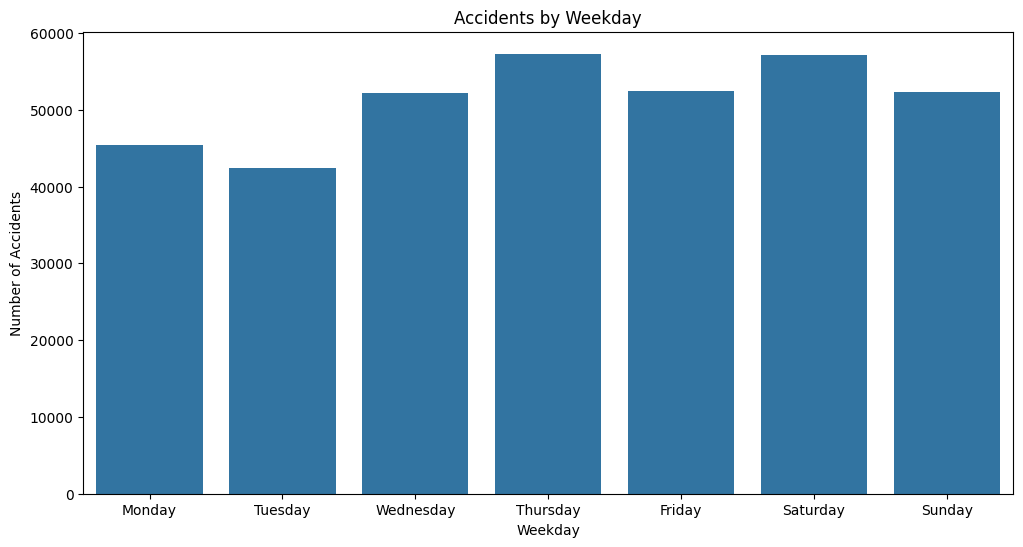

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(x='Weekday', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Accidents by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Accidents')
plt.show()

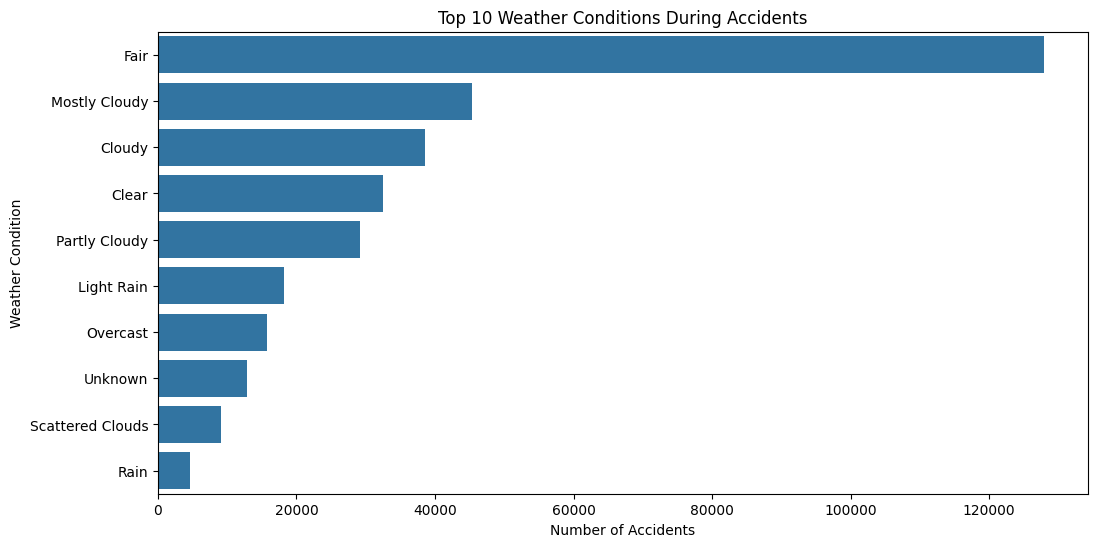

In [16]:
plt.figure(figsize=(12,6))
top_weather = df['Weather_Condition'].value_counts().nlargest(10).index
sns.countplot(y='Weather_Condition', data=df[df['Weather_Condition'].isin(top_weather)], order=top_weather)
plt.title('Top 10 Weather Conditions During Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.show()

In [17]:
import folium
from folium.plugins import HeatMap


In [18]:
sample_df = df[['Start_Lat', 'Start_Lng']].dropna().sample(n=10000, random_state=1)

In [19]:
base_map = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

In [20]:
HeatMap(data=sample_df[['Start_Lat', 'Start_Lng']].values, radius=8).add_to(base_map)

In [21]:
base_map